
# Logistic Regression

We have taken an advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

## Import Libraries



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
dataset= pd.read_csv('C:/Users/san15/OneDrive/Documents/Stats and ML/Logistic_Regression/advertising.csv')

In [16]:
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [38]:
sum(dataset['Age'].apply(lambda age: age==35))

39

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Male                        1000 non-null int64
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [19]:
ff = dataset.groupby(['Age'])
ff.sum()

,Daily Time Spent on Site,Area Income,Daily Internet Usage,Male,Clicked on Ad
Age,,,,,
19,365.80,283778.89,1126.92,4,1
20,400.25,304227.64,1169.99,5,1
21,410.76,304587.43,1249.41,4,0
22,923.13,693719.29,2575.55,4,1
23,1298.33,947186.86,3496.70,10,8
24,1496.16,1143433.92,4059.49,9,6
25,1926.74,1507427.71,5454.77,18,4
26,2568.91,2125301.48,7363.26,18,8
27,2346.08,1895558.49,6555.21,17,7


In [7]:
dataset

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0
5,59.99,23,59761.56,226.74,1,0
6,88.91,33,53852.85,208.36,0,0
7,66.00,48,24593.33,131.76,1,1
8,74.53,30,68862.00,221.51,1,0
9,69.88,20,55642.32,183.82,1,0


In [17]:
df2 = dataset[['Age','Male']]
df2

,Age,Male
0,35,0
1,31,1
2,26,0
3,29,1
4,35,0
5,23,1
6,33,0
7,48,1
8,30,1
9,20,1


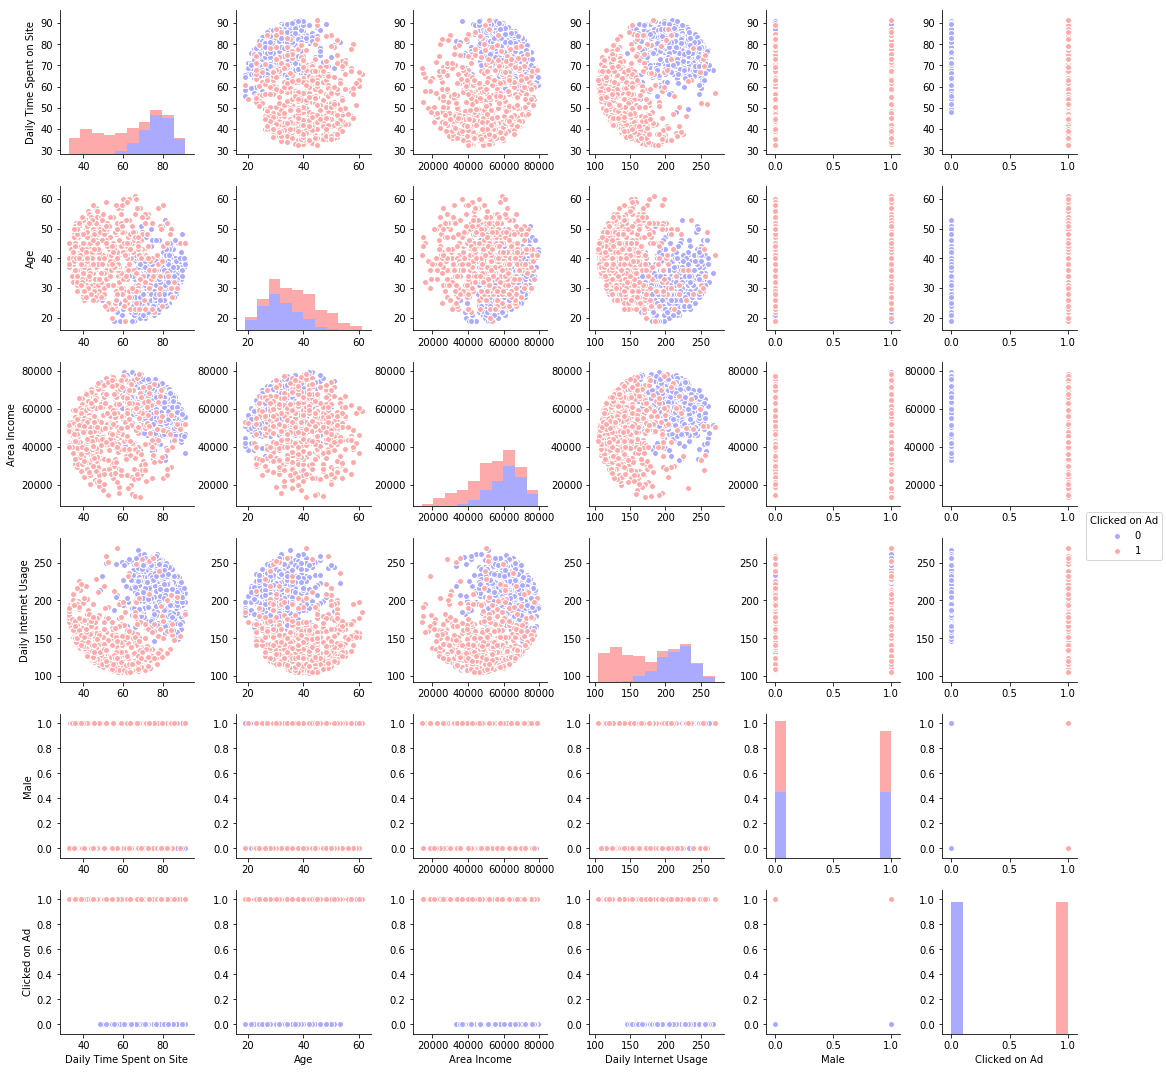

In [6]:
sns.pairplot(dataset,hue='Clicked on Ad',palette='bwr')

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = dataset.iloc[:,3:5].values
y = dataset.iloc[:,5].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
#Fearure Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)



### Training and fitting a logistic regression model on the training set

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations


In [13]:
predictions = logmodel.predict(X_test)

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.88      0.87       162
          1       0.88      0.87      0.88       168

avg / total       0.88      0.88      0.88       330



## Now we will implement L1 Loss Function

### L1 Loss function minimizes the absolute differences between the estimated values and the existing target values.

In [16]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression("l1",random_state=0)
classifier1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Parameters

### penalty : str, ‘l1’ or ‘l2’, default: ‘l2’ - Used to specify the norm used in the penalization

### random_state : int, RandomState instance or None, optional, default: None   |   The seed of the pseudo random number generator to use when shuffling the data

In [17]:
y_pred1 = classifier1.predict(X_test)
y_pred1

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0,

In [18]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred1)
cm1

array([[144,  18],
       [ 24, 144]], dtype=int64)

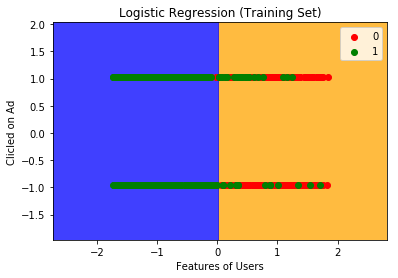

In [19]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier1.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('orange','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Features of Users')
plt.ylabel('Clicled on Ad')
plt.legend()
plt.show()

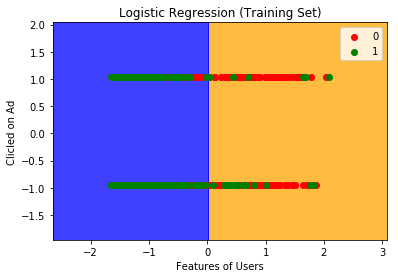

In [20]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier1.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('orange','blue')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Features of Users')
plt.ylabel('Clicled on Ad')
plt.legend()
plt.show()

In [21]:
accuracy1 = 1.0 - (float(np.count_nonzero(y_pred1-y_test)) / len(y_pred1-y_test))
accuracy1

0.8727272727272728

### Now we will implement L2 Loss Function

### L2 loss function minimizes the squared differences between the estimated and existing target values.

In [22]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression("l2",random_state=0)
classifier2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
y_pred2 = classifier2.predict(X_test)
y_pred2

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0,

In [24]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test,y_pred2)
cm2

array([[143,  19],
       [ 22, 146]], dtype=int64)

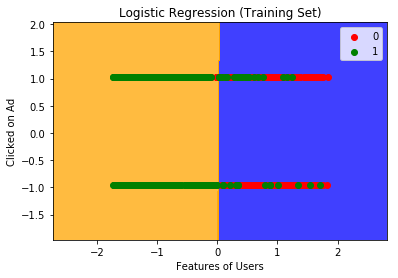

In [25]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('blue','orange')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Features of Users')
plt.ylabel('Clicked on Ad')
plt.legend()
plt.show()

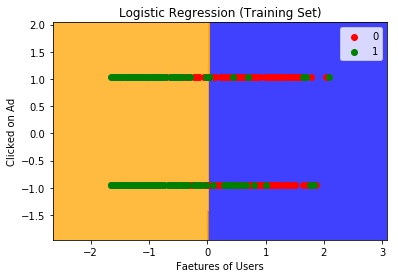

In [26]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test

X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1,X2,classifier2.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('blue','orange')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Faetures of Users')
plt.ylabel('Clicked on Ad')
plt.legend()
plt.show()

In [27]:
accuracy2 = 1.0 - (float(np.count_nonzero(y_pred2-y_test)) / len(y_pred2-y_test))
accuracy2

0.8757575757575757

### Through the accuracy of both the models we can say that L2 function fits best to our data set than L1 loss function.

### References

### 1.http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 2.https://stackoverflow.com/questions/34448288/using-l1-penalty-with-logisticregressioncv-in-scikit-learn

